In [1]:
import numpy as np
np.random.seed(42)

In [2]:
from plotting import plot_dataset
from plotting import plot
from dataset import generate_dataset

In [3]:
x, y = generate_dataset()

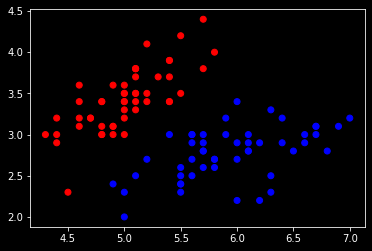

In [4]:
plot_dataset(x, y)

# Logistic Regression - Binary Classification

Computes the probability that a sample is class 1 (positive).
To get the porbability of class 0 (negative), you can compute

$
P(y=class_0) = (1 - P(y=class_1))
$

$
z = \beta_{0} + \beta_{1} * X
$

$
p = \frac{1}{1 + \exp^{-(z)}}
$

$
z \in (-\inf, \inf)
$

$
p \in (0, 1)
$

In [5]:
class LogisticRegression:
    def __init__(self, learning_rate: float = 0.1, max_iter: int = 10_000, fit_intercept: bool = True) -> None:
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.fit_intercept = fit_intercept

    def add_bias(self, x: np.ndarray) -> np.ndarray:
        intercept = np.ones((x.shape[0], 1))
        return np.concatenate((intercept, x), axis=1)

    def _activation(self, z: np.ndarray) -> np.ndarray:
        return 1.0 / (1.0 + np.exp(-z))

    def _forward(self, x: np.ndarray) -> np.ndarray:
        if x.shape[1] != self.w.shape[0] and self.fit_intercept:
            x = self.add_bias(x)
        z = np.dot(x, self.w)
        y_pred = self._activation(z)
        return y_pred

    def _update_weights(
        self, x: np.ndarray, y: np.ndarray, y_pred: np.ndarray
    ) -> None:
        loss = (y_pred - y)
        gradient = np.dot(x.T, loss) / y.shape[0]
        self.w = self.w - self.learning_rate * gradient

    def fit(self, x: np.ndarray, y: np.ndarray) -> None:
        if self.fit_intercept:
            x = self.add_bias(x)

        _, dim = x.shape
        self.w = np.random.normal(loc=0.0, scale=0.01, size=(dim,))

        for _ in range(self.max_iter):
            y_pred = self._forward(x)
            self._update_weights(x, y, y_pred)

    def predict_prob(self, x: np.ndarray) -> np.ndarray:
        return self._forward(x)

    def predict(self, x: np.ndarray) -> np.ndarray:
        y_pred_prob = self.predict_prob(x)
        return np.round(y_pred_prob)

    def score(self, x: np.ndarray, y: np.ndarray) -> float:
        y_pred = self.predict(x)
        return np.mean(y == y_pred)

In [6]:
clf = LogisticRegression(
    learning_rate=0.001, max_iter=10_000, fit_intercept=False
)

clf.fit(x, y)

score = clf.score(x, y)

print(f"Score: {score}")
print(f"W:\n{clf.w}")

Score: 0.99
W:
[ 0.90359799 -1.57397375]


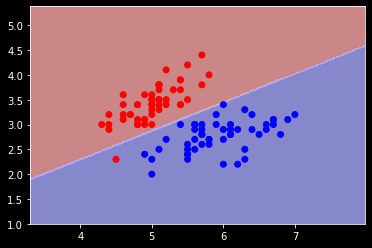

In [7]:
plot(clf, x, y)